In [64]:
from __future__ import print_function, division
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
# generate data points in a straight line
np.random.seed(1006)
def line(x,a,b):
    #add offset to each point to rep statistical error -normal dist
    e = np.random.randn(len(x)) * 7
    return a * x + b + e, e

In [66]:
x = np.arange(0.,20.,2)
x

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.])

In [67]:
values, errors = line (x, 6, 8)

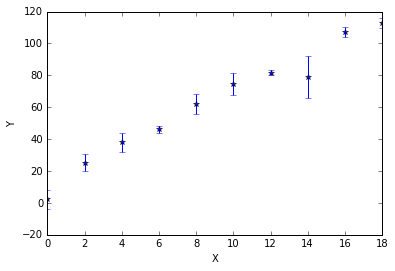

In [72]:
#pl.plot(x,values,'*') 
pl.errorbar(x,values,yerr = errors,fmt = '*')
pl.xlabel('X')
pl.ylabel('Y')

In [56]:
import statsmodels.api as sm

In [57]:
#sm.OLS?

In [58]:
X = sm.add_constant(x)
X

array([[  1.,   0.],
       [  1.,   2.],
       [  1.,   4.],
       [  1.,   6.],
       [  1.,   8.],
       [  1.,  10.],
       [  1.,  12.],
       [  1.,  14.],
       [  1.,  16.],
       [  1.,  18.]])

In [59]:
ols_obj = sm.OLS(values, X)

In [60]:
our_model = ols_obj.fit()

In [61]:
x_new = np.arange(22)

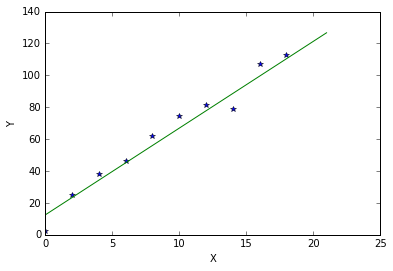

In [75]:
pl.plot(x,values,'*')
pl.xlabel('X')
pl.ylabel('Y')

pl.plot(x_new, our_model.predict(sm.add_constant(x_new)))

In [76]:
our_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     125.0
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           3.67e-06
Time:                        20:31:38   Log-Likelihood:                -34.861
No. Observations:                  10   AIC:                             73.72
Df Residuals:                       8   BIC:                             74.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         12.5164      5.193      2.410      0.042         0.542    24.491
x1             5.4382      0.486     11.181      0.000         4.317     6.560
==============================================================================
Omnibus:                        0.268   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.413
Skew:                           0.147   Prob(JB):                        0.813
Kurtosis:                       2.049   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
import statsmodels.formula.api as smf

In [77]:
wls_obj = sm.WLS(values, X, weight = errors)
our_w_model = wls_obj.fit()

In [78]:
our_w_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            WLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     250.2
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.55e-07
Time:                        20:33:48   Log-Likelihood:                -31.924
No. Observations:                  10   AIC:                             67.85
Df Residuals:                       8   BIC:                             68.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         11.2594      3.871      2.908      0.020         2.332    20.186
x1             5.7353      0.363     15.819      0.000         4.899     6.571
==============================================================================
Omnibus:                        4.222   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.080
Skew:                          -1.116   Prob(JB):                        0.354
Kurtosis:                       2.893   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""